In [1]:
import pandas as pd
import os  


Merging the data into a single CSV file

In [2]:
files = [file for file in os.listdir("./Sales_Data")]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv("all_data.csv", index = False)

Read the updated dataframe

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


Clean up the data

Drop all the NAN values

In [4]:
nan_df = all_data[all_data.isna().any(axis =1)]
nan_df.head()

all_data = all_data.dropna(how = 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Find "OR" and delete it

In [5]:
all_data = all_data[all_data["Order Date"].str[0:2] != "Or"]

Convert columns data into correct formart

In [6]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

Add month column

In [7]:
all_data["Month"] = all_data["Order Date"].str[0:2]
all_data["Month"] = all_data["Month"].astype("int32")
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",9


Add a sales column

In [8]:
all_data["Sales"] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


Best month for sales and how much ws earned

In [9]:
results  = all_data.groupby("Month").sum()[[ 'Quantity Ordered' ,'Price Each', 'Sales']]
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


Add city column

In [10]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + " (" + get_state(x) + ")")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


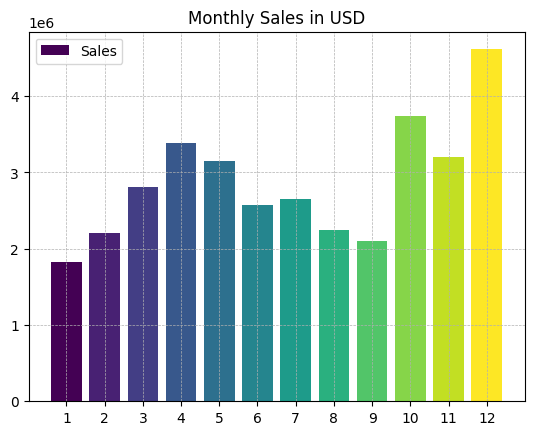

<module 'matplotlib.pyplot' from 'c:\\Python312\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
months = range(1, 13)
sales = results['Sales']

# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(months)))

# Create a bar plot
plt.bar(months, sales, color=colors, label='Sales')

# Set x-ticks and labels
plt.xticks(months)



# Adding a legend
plt.legend()

# Adding a title
plt.title('Monthly Sales in USD')

# Adding grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# # Labeling the axes
# plt.xlabels('Month number', fontsize=14, fontweight='bold')

# plt.ylabel('Sales in USD ($)', fontsize=14, fontweight='bold')

# Display the plot
plt.show()
plt


What city have the highest number of sales

In [12]:
results =  all_data.groupby('City').sum()[[ 'Quantity Ordered' ,'Price Each', 'Sales']]
results

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta (GA),16602,2779908.20,2795498.58
Austin (TX),11153,1809873.61,1819581.75
Boston (MA),22528,3637409.77,3661642.01
Dallas (TX),16730,2752627.82,2767975.40
Los Angeles (CA),33289,5421435.23,5452570.80
New York City (NY),27932,4635370.83,4664317.43
Portland (ME),2750,447189.25,449758.27
Portland (OR),11303,1860558.22,1870732.34
San Francisco (CA),50239,8211461.74,8262203.91


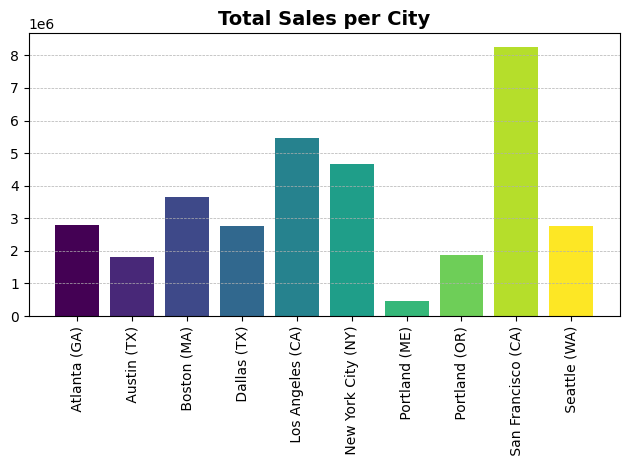

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Generate the list of cities
cities = [city for city, df in all_data.groupby('City')]

# Create a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(cities)))

# Create a bar plot
plt.bar(cities, results['Sales'], color=colors)

# Set x-ticks and labels
plt.xticks(cities, rotation='vertical', fontsize=10)

# Labeling the axes
# plt.xlabel('City', fontsize=12, fontweight='bold')
# plt.ylabel('Sales in USD ($)', fontsize=12, fontweight='bold')

# Adding a title
plt.title('Total Sales per City', fontsize=14, fontweight='bold')

# Adding grid lines
plt.grid(True, which='both', linestyle='--', linewidth=0.5, axis='y')

# Adjust layout to ensure everything fits without overlapping
plt.tight_layout()

# Display the plot
plt.show()


What time should we display advertisements to maximize likelihood off customer's buying product

In [14]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format='%m/%d/%y %H:%M')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


In [15]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


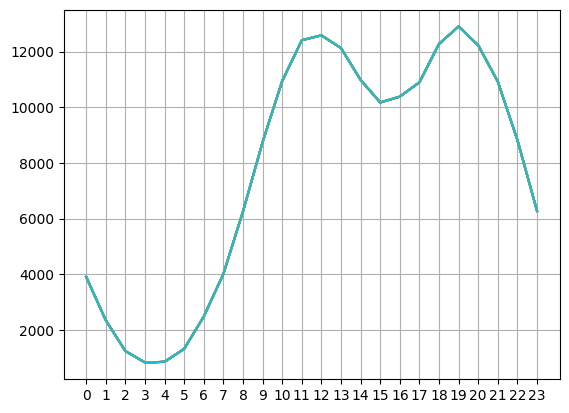

In [16]:
hours = [hour for hour, df in all_data.groupby("Hour")]
plt.plot(hours, all_data.groupby("Hour").count())
plt.xticks(hours)
plt.grid()
plt.show()

Products often sold together

In [17]:
df =all_data[all_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))

df = df[['Order ID', "Grouped"]].drop_duplicates()
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_18948\3567447705.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [18]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


What product sod th most? Why do you think is sold the most

In [23]:
product_group = all_data.groupby("Product")
quality_ordered = product_group.sum(numeric_only=True)['Quantity Ordered']
quality_ordered


Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

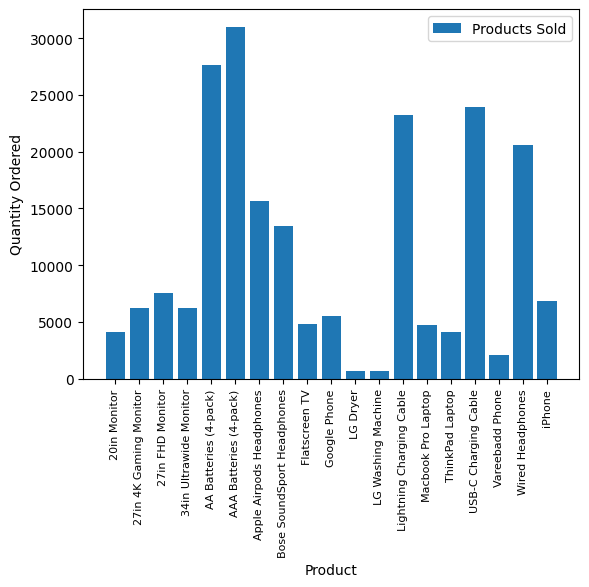

In [25]:
products = [product for product, df in product_group]

plt.bar(products, quality_ordered, label= "Products Sold")
plt.xticks(products, rotation = 'vertical', size =8, )
plt.ylabel("Quantity Ordered")
plt.xlabel("Product")
plt.legend()
plt.show()

    

Chec for aaverage price

In [27]:
prices = all_data.groupby("Product").mean(numeric_only=True)['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_18948\3039544448.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation = 'vertical', size=8)


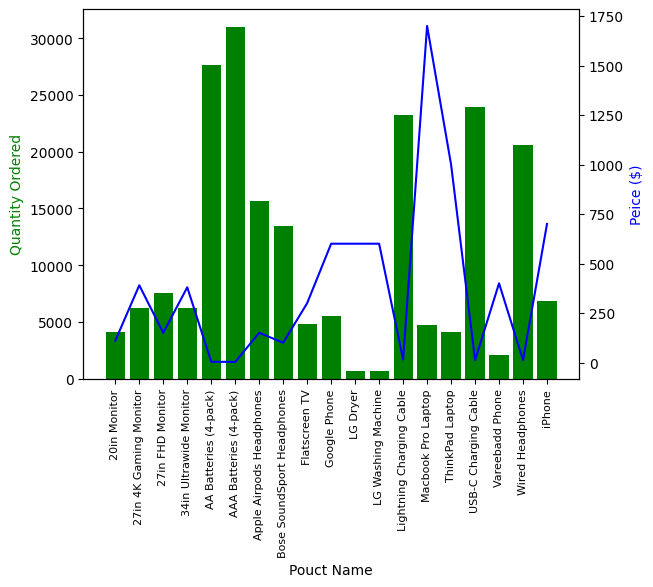

In [31]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quality_ordered, color ='g')
ax2.plot(products,prices, 'b-')

ax1.set_xlabel('Pouct Name')
ax1.set_ylabel("Quantity Ordered", color='g')
ax2.set_ylabel('Peice ($)', color='b')

ax1.set_xticklabels(products, rotation = 'vertical', size=8)
plt.show()